<a href="https://colab.research.google.com/github/ahmedmekled/Alpha-ML/blob/main/Alpha-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Minapharm ML Engineer Technical Assesment:</h2> 

<h4>Objective:</h4>
You are provided with a medical related dataset, containing 5k articles. You are required to demonstrate your NLP, data-mining & topic extraction skills to extract the topics that are included within the dataset along with mapping each article to the corresponding topic names. Each document should be matched to the top three most relevant topic names including the matching probability score.
Kindly, mention how you came up with the optimum number of topics extracted and a final evaluation statement of your work.


<h4>Requirements:</h4>

   - It is recommended to use Python/R + LDA for topic name extraction. If you use other technology, you must mention your reasoning for your choice.   

   - Document your code and communicate your overall evaluation of the problem at hand   
   - You are expected to include along with your solution a report explaining:   
   
      - Tools used
      - All performed steps, reasoning and outcomes
      - How you can further improve the results
      - How to further clean & optimize the data-sets to improve the performance of the LDA algorithm
      - Metrics used or to use if any to measure/ improve quality of results?


<h2>Dataset:</h2>

[Pubmed5k.rar](https://www.minapharm.com/gShare/Pubmed5k.rar)

<h2>Table of content</h2>
<div style="margin-top: 20px">
<ul>
    <li>Data Preprocessing
        <ul>
            <li>Importing basic Libraries</li>
            <li>Reading the data</li>
            <li>Data filtering & cleaning</li>
        </ul>
    </li>
    <li>NLP Phase
        <ul>
            <li>Using TF-IDF</li>
            <li>Using Doc2Vec</li>
            <li>Using LDA</li>
        </ul>
    </li>

    
    
  <li>Future Work
      <ul>
            <li>How to further clean & optimize the data-sets?</li>
            <li>How you can further improve the results?</li>
      </ul>

  </li>


</ul>
    
</div>
 
<hr>

# Data Preprocessing </h1>

## Importing basic Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

## Reading the data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_excel("/content/Pubmed5k.xlsx")
df

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...
...,...,...,...
4994,34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...
4995,34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...
4996,34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...
4997,34444571,Pre-Intervention Effects of a Community-Based ...,This study explores the impact of the 'pre-int...


## Data filtering and cleaning

**Checking the type of data fro each dataframe**

In [4]:
df.dtypes

ArticleID     int64
Title        object
Abstract     object
dtype: object

**Checking NaNs**

In [5]:
df.isnull().values.any()

False

**Checking duplicates**

In [6]:
series = df.duplicated(keep=False).__eq__(True)
df.duplicated(keep=False).__getitem__(series)

Series([], dtype: bool)

**Re-checking for any uniqueness in the Title column** 

In [7]:
len(df["Title"].unique())

4999

**Fetch word count for each Title & Abstract**

In [8]:
#Fetch wordcount for each Title & Abstract
Title_Word_Count = []
Abstract_Word_Count = []
Title_Word_Count = df['Title'].apply(lambda x: len(str(x).split(" ")))
Abstract_Word_Count = df['Abstract'].apply(lambda x: len(str(x).split(" ")))

**Descriptive statistics of word counts**

In [9]:
print("Title_Word_Count description:")
print(Title_Word_Count.describe())
print("\n")
print("Abstract_Word_Count description:")
print(Abstract_Word_Count.describe())

Title_Word_Count description:
count    4999.000000
mean       14.911982
std         4.981343
min         1.000000
25%        11.000000
50%        15.000000
75%        18.000000
max        39.000000
Name: Title, dtype: float64


Abstract_Word_Count description:
count    4999.000000
mean      211.240448
std        80.544815
min         1.000000
25%       158.000000
50%       208.000000
75%       253.000000
max       976.000000
Name: Abstract, dtype: float64


**Identify common & uncommon words for each Title**

In [10]:
#Identify common words for each Title
freq = pd.Series(' '.join(df['Title']).split()).value_counts()[:30]
c_count = pd.DataFrame(freq)
c_count.reset_index(inplace = True)
c_count.rename(columns = {'index':'Words_Before', 0:'Count'}, inplace = True)
c_count.head()

,Words_Before,Count
0,of,4161
1,and,2980
2,in,2731
3,the,1974
4,a,1167


In [11]:
#Identify uncommon words for each Title
nfreq =  pd.Series(' '.join(df 
         ['Title']).split()).value_counts()[-30:]
n_count = pd.DataFrame(nfreq)
n_count.reset_index(inplace = True)
n_count.rename(columns = {'index':'Words_Before', 0:'Count'}, inplace = True)
n_count.head()

,Words_Before,Count
0,measles,1
1,progressive,1
2,midst,1
3,tasks,1
4,present,1


**Changing all the charecters to lower-case in both the Abstract & Title**

In [12]:
df['Title'] = df['Title'].str.lower()
df['Abstract'] = df['Abstract'].str.lower()

**Identify common & uncommon words for each Title after lower-casing**

In [13]:
#Identify common words for each Title
freq = pd.Series(' '.join(df['Title']).split()).value_counts()[:30]
c_count2 = pd.DataFrame(freq)
c_count2.reset_index(inplace = True)
c_count2.rename(columns = {'index':'Words_After', 0:'Count'}, inplace = True)
c_count = pd.concat([c_count, c_count2], axis=1)

In [14]:
c_count.head()

,Words_Before,Count,Words_After,Count
0,of,4161,of,4257
1,and,2980,and,3026
2,in,2731,in,2807
3,the,1974,the,2378
4,a,1167,a,1945


**As we can see, there is a segnificant change here after lower-casing the characters**

In [15]:
#Identify uncommon words for each Title
nfreq =  pd.Series(' '.join(df 
         ['Title']).split()).value_counts()[-30:]
n_count2 = pd.DataFrame(nfreq)
n_count2.reset_index(inplace = True)
n_count2.rename(columns = {'index':'Words_After', 0:'Count'}, inplace = True)
n_count = pd.concat([n_count, n_count2], axis=1)

In [16]:
n_count.head()

,Words_Before,Count,Words_After,Count
0,measles,1,peste,1
1,progressive,1,des,1
2,midst,1,petits,1
3,tasks,1,ruminants,1
4,present,1,livestock,1


**Also, it is very segnifican here that the least frequent words changed after altering the case sensitivity**

In [17]:
dff = copy.deepcopy(df)
dff

,ArticleID,Title,Abstract
0,34153941,stable coordination variability in overground ...,coordination variability (cv) is commonly anal...
1,34153942,weak hip strength increases dynamic knee valgu...,clinical scenario: dynamic knee valgus (dkv) i...
2,34153964,current and future projections of amyotrophic ...,various methodologies have been reported to as...
3,34153968,disparities between asian and non-asian thromb...,as outcomes for acute ischemic stroke (ais) va...
4,34153978,maternal factors predicting loss to follow-up ...,because hearing loss in children can result in...
...,...,...,...
4994,34444567,mind the differences: how diagnoses and hospit...,integrated care pathway (icp) is a prevailing ...
4995,34444568,the ethics of dying: deciphering pandemic-resu...,the objective of medicine is to provide humans...
4996,34444569,research on adolescents regarding the indirect...,this research involved the participation of 30...
4997,34444571,pre-intervention effects of a community-based ...,this study explores the impact of the 'pre-int...


## <hr>

# NLP phase

<h2>The main steps of text processing:</h2>

    1- Tokenization: Segregation of the text into its individual constitutent words.
    
    2- Stopwords: Throw away any words that occur too frequently as its frequency of occurrence will not be useful in helping detecting relevant texts. (as an aside also consider throwing away words that occur very infrequently).

    3- Stemming: combine variants of words into a single parent word that still conveys the same meaning

    4- Vectorization: Map all the tokens in data into vectors for ease of feeding into models
    

In [ ]:
import re
from tqdm import tqdm
import nltk
nltk.download('punkt')

## a- TF-IDF:

**First trial to pre process and filter using basic techniques**

In [18]:
# Libraries for text preprocessing
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [46]:
##Stemming
ps=PorterStemmer()
#Lemmatisation
lem = WordNetLemmatizer()

def preprocess(data):
  corpus = []
  for i in range(0, len(data)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Abstract'][i])
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    text = [lem.lemmatize(word) for word in text if not word in  
            stopwords.words('english')]
    text = " ".join(text)
    corpus.append(text)

  return corpus

In [47]:
dff_f = preprocess(dff)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(2,100))
x = tfidf_v.fit_transform(tqdm(dff_f)).toarray()

 18%|█▊        | 908/4999 [00:29<02:11, 31.05it/s]


KeyboardInterrupt: ignored

**Here I tried to use TF-IDF but it ate all the RAM and the notebook failed several times**

**Trying another technique**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(dff_f)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


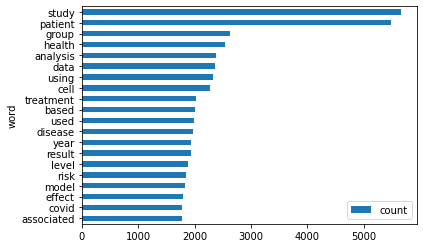

In [49]:
word_count = pd.DataFrame({'word': cv.get_feature_names(), 'count': np.asarray(x.sum(axis=0))[0]});

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh');

## b- Doc2Vec

In [18]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
    
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [19]:
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
cores = multiprocessing.cpu_count()
dff['Abstract'] = dff['Abstract'].apply(cleanText)

train_tagged = dff.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Abstract']), tags=[r.Title]), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [21]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged)])

100%|██████████| 4999/4999 [00:00<00:00, 1086164.82it/s]


In [118]:
ff =  []
for i in range(0,4999):
  ff.append(model_dbow[i].sum())
print(min(ff), max(ff))

-0.058116704 0.05513382


In [119]:
for i in range(0,4999):
  ff[i] = ff[i] + 2.2554016293474533e-10 + 0.058116704
min(ff)

0.0

In [158]:
def recall(index, no):
  y = []
  for i in range(0,4999):
    y.append(abs(ff[index] - ff[i]))
  z = pd.DataFrame(data = y)
  k_nearest = z[z != 0].nsmallest(n=no, columns = 0).index
  k_distances = z[z != 0].nsmallest(n=no, columns = 0)

  return k_nearest, k_distances
k_nearest, k_distances = recall(55, 5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances
print(dff["Title"][55])
k_nearest

transformation of the learning process in higher education institutions under the influence of the pandemic covid-19.


,ArticleID,Title,Abstract,similarity
2682,34705848,comparison of service tactic formation on play...,the aim of this study was to analyze the influ...,0.999994
3079,34811072,morphological description of a new specimen of...,the original description of burbrinks keelback...,0.999990
4355,34328475,horizontal bone augmentation in the posterior ...,the aim of this study was to analyze horizonta...,0.999988
1248,34361755,humic acid improves zn fertilization in oxisol...,zinc (zn) is an essential micronutrient for pl...,0.999985
1555,34424515,sensory systems of the african naked mole-rat.,naked mole-rats share some sensory characteris...,0.999974


**The output is not accurate at all**

**Trying another way: standarizing then caculate**

In [22]:
def createList(r1, r2):
    return list(range(r1, r2+1))
c = createList(0,299)
mm = pd.DataFrame(columns=c)
for i in range(0,4999):
  mm.loc[i] = model_dbow[i].tolist()

In [23]:
from sklearn import preprocessing

x = mm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mm = pd.DataFrame(x_scaled)
mm

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.508612,0.964107,0.638645,0.026815,0.624282,0.345615,0.285117,0.999550,0.981765,0.536599,...,0.649008,0.917993,0.182940,0.551782,0.894133,0.865705,0.277633,0.667251,0.068458,0.336974
1,0.711421,0.336790,0.283256,0.771449,0.507758,0.202097,0.465165,0.508604,0.957068,0.523439,...,0.665072,0.636686,0.083501,0.324594,0.830109,0.732856,0.304453,0.243282,0.011630,0.398286
2,0.513074,0.278179,0.304813,0.212048,0.684653,0.187344,0.563404,0.473283,0.387880,0.535732,...,0.029148,0.513943,0.907560,0.404783,0.606445,0.550476,0.477372,0.990268,0.853066,0.140480
3,0.446764,0.102886,0.666461,0.704084,0.765778,0.132636,0.462267,0.507959,0.402113,0.737015,...,0.928336,0.008907,0.433316,0.226695,0.567335,0.130116,0.660099,0.916217,0.483457,0.201528
4,0.740896,0.959582,0.472803,0.186988,0.742268,0.775450,0.681131,0.472042,0.951987,0.164209,...,0.796762,0.706258,0.817648,0.849539,0.735561,0.981049,0.674799,0.270117,0.949750,0.763898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.870754,0.411618,0.555632,0.476884,0.322599,0.464344,0.968008,0.318480,0.893610,0.138792,...,0.610761,0.336523,0.334387,0.360918,0.289004,0.627575,0.245436,0.386162,0.052354,0.386085
4995,0.591134,0.202516,0.769066,0.510855,0.779444,0.462990,0.599454,0.863516,0.304035,0.960347,...,0.784829,0.442641,0.694629,0.501371,0.937243,0.251499,0.428492,0.296350,0.028935,0.210861
4996,0.966930,0.292527,0.102456,0.490702,0.978732,0.963869,0.718021,0.843723,0.561942,0.221322,...,0.199357,0.607320,0.687854,0.002967,0.870648,0.924934,0.725182,0.682590,0.401222,0.026187
4997,0.839329,0.463682,0.028285,0.333504,0.273696,0.731684,0.536063,0.909465,0.486190,0.372635,...,0.658395,0.306540,0.222058,0.702609,0.405104,0.079886,0.645122,0.520013,0.423455,0.898515


In [50]:
from scipy.spatial.distance import jensenshannon
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import correlation
from scipy.spatial.distance import cosine

y = mm[dff.ArticleID == 34166137].iloc[0]
d = mm.apply(lambda x: euclidean(x, y), axis=1)
k_nearest = d[d != 0].nlargest(n=5).index
k_distances = d[d != 0].nlargest(n=5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = k_distances/10
print(dff["Title"][107])

for i in range(0,3):
  k_nearest.reset_index(drop=True, inplace=True)
  print(k_nearest['Title'][i] +"  " + "{:.2f}".format(k_nearest['similarity'][i]))

mental stress, anxiety and depressive symptoms and interleuken-6 level among healthcare workers during the covid-19 pandemic.
real-time fluorescent measurement of synaptic functions in models of amyotrophic lateral sclerosis.  0.80
knee osteonecrosis after covid-19.  0.78
review of the emerging evidence demonstrating the efficacy of ivermectin in the prophylaxis and treatment of covid-19.  0.77


For the previous example, it only shows the topic with COVID-19 but the main aim was depression.<br>
**So, not that effecient, the similarities are very low**

## c- LDA

**Importing all the libraries that will be used in this section**

In [51]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

!pip install scispacy
import scispacy

!pip install spacy
import spacy

!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz
import en_core_sci_lg

#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.2.0/en_core_web_md-3.2.0.tar.gz
#import en_core_web_md

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from os.path import isfile

     |████████████████████████████████| 44 kB 1.3 MB/s 
     |████████████████████████████████| 71 kB 6.9 MB/s 
     |████████████████████████████████| 13.5 MB 40.7 MB/s 
     |████████████████████████████████| 6.0 MB 40.4 MB/s 
     |████████████████████████████████| 188 kB 53.5 MB/s 
     |████████████████████████████████| 10.1 MB 45.3 MB/s 
     |████████████████████████████████| 653 kB 43.9 MB/s 
     |████████████████████████████████| 42 kB 977 kB/s 
     |████████████████████████████████| 457 kB 49.1 MB/s 
     |████████████████████████████████| 181 kB 44.0 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: s

     |████████████████████████████████| 532.3 MB 16 kB/s 
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.5.0-py3-none-any.whl size=532569823 sha256=387e43dac82c113791bef244a2d4b072a7916a4549308ff50643320e29f14eb2
  Stored in directory: /root/.cache/pip/wheels/c1/69/da/683231a48569a53313ed6530869e4743fe57c344412a56b25f
Successfully built en-core-sci-lg


**Loading spaCy** 

[spaCy](https://spacy.io/usage/spacy-101) *is a free, open-source library for advanced Natural Language Processing (NLP) in Python.*

The next step is to train the unsupervised machine learning model on the data. I choose to work with the **Sklearn LDA** over **Gensim LDA**.

There are 3 model size:
> Model size indicator:
>> **sm:** no word vectors <br>
>> **md:** reduced word vector table with 20k unique vectors for ~500k words<br>
>> **lg:** large word vector table with ~500k entriesUsing the lg

**Here we will be using "lg" model as it gives more dimensionality and complexity** <br>
*Also because the other model gave less compitability in comparison to this one*

In [52]:
#nlp = en_core_sci_lg.load(disable=["tagger", "parser", "ner"])
nlp = spacy.load("en_core_sci_lg") # phrase to tokenize
nlp.max_length = 3000000

**Lemmatizing**

In [53]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

**Tokenizing and Vectorizing**

In [54]:
text = dff["Abstract"]
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
data_vectorized = vectorizer.fit_transform(tqdm(text))

100%|██████████| 4999/4999 [05:40<00:00, 14.69it/s]


In [55]:
data_vectorized.shape

(4999, 16855)

**Plotting the most 20 most frequent words in all the dataset**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


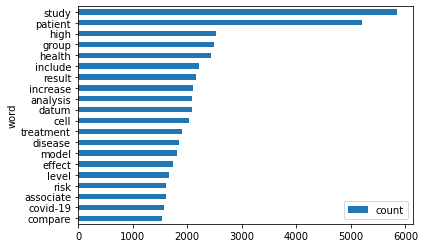

In [72]:
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]});

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh');

**Saving the output to a csv file**

In [31]:
joblib.dump(vectorizer, 'vectorizer.csv')
joblib.dump(data_vectorized, 'data_vectorized.csv')

['data_vectorized.csv']

**Perfoming LDA and save it to a csv aswell** - same idea as using pickle.

In [56]:
lda = LatentDirichletAllocation(n_components=50, random_state=0)
# Learn model for the data with variational Bayes method.
lda.fit(data_vectorized)
joblib.dump(lda, 'lda.csv')

['lda.csv']

In [36]:
def print_top_words(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
print_top_words(lda, vectorizer, n_top_words=25)

**Transforming the data according to the fitted model.**

In [57]:
doc_topic_dist = pd.DataFrame(lda.transform(data_vectorized))
doc_topic_dist.to_csv('doc_topic_dist.csv', index=False)

In [66]:
doc_topic_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000169,0.000169,0.000169,0.000169,0.000169,0.137403,0.000169,0.000169,0.462415,0.000169,...,0.000169,0.000169,0.000169,0.000169,0.000169,0.000169,0.000169,0.239740,0.000169,0.000169
1,0.000164,0.000164,0.000164,0.000164,0.000164,0.171438,0.000164,0.000164,0.227188,0.000164,...,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.000164,0.381942,0.000164,0.000164
2,0.091695,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,...,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138,0.000138
3,0.419592,0.000100,0.000100,0.000100,0.000100,0.175913,0.000100,0.000100,0.399818,0.000100,...,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100
4,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.000179,0.026245,...,0.000179,0.000179,0.069609,0.000179,0.000179,0.140739,0.579051,0.000179,0.000179,0.000179


**Choosing the optimal distance calculation:**<br>
* Euclidean
* Correlation
* Jensen-Shannon
* Cosine
* Cityblock

##### Euclidean

In [119]:
from scipy.spatial.distance import euclidean
y = doc_topic_dist[dff.ArticleID == 34160290].iloc[0]
e = doc_topic_dist.apply(lambda x: euclidean(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=5).index
k_distances = e[e != 0].nsmallest(n=5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
122,34166265,refractory severe laryngospam during rapid seq...,laryngospasm is a rare cause of upper-airway o...,0.805898
1574,34424840,bioprinting marches forward with new technology.,with the advent of additive manufacturing and ...,0.829601
2748,34706001,stress distribution analysis in anterior teeth...,orthodontic retraction of the anterior teeth i...,0.834120
993,34332561,investigation of transient eye closure evoked ...,this study aimed to present a simple method fo...,0.833460
0,34153941,stable coordination variability in overground ...,coordination variability (cv) is commonly anal...,0.731105


##### Correlation

In [118]:
from scipy.spatial.distance import correlation
z = doc_topic_dist.apply(lambda x: correlation(x, y), axis=1)
k_nearest = z[z != 0].nsmallest(n=10).index
k_distances = z[z != 0].nsmallest(n=10)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,ArticleID,Title,Abstract,similarity
993,34332561,investigation of transient eye closure evoked ...,this study aimed to present a simple method fo...,0.833460
2748,34706001,stress distribution analysis in anterior teeth...,orthodontic retraction of the anterior teeth i...,0.834120
1574,34424840,bioprinting marches forward with new technology.,with the advent of additive manufacturing and ...,0.829601
122,34166265,refractory severe laryngospam during rapid seq...,laryngospasm is a rare cause of upper-airway o...,0.805898
0,34153941,stable coordination variability in overground ...,coordination variability (cv) is commonly anal...,0.731105
4293,34328422,content analysis and quality evaluation of ces...,youtube is one of the most popular open-access...,0.675247
193,34182470,optimizing conditions for spheroid formation o...,spheroid formation is a well-known feature of ...,0.685698
4202,34321490,elevated levels of merkel cell polyoma virus i...,the human ocular surface hosts a paucibacteria...,0.690825
1372,34398958,urine lipoarabinomannan testing in adults with...,the urine lipoarabinomannan (lam) antigen test...,NaN
1368,34398954,changing epidemiology of hepatitis b virus and...,the transmission of human immunodeficiency vir...,0.691746


##### Jensen–Shannon

In [117]:
from scipy.spatial.distance import jensenshannon
y = doc_topic_dist[dff.ArticleID == 34160290].iloc[0]
d = doc_topic_dist.apply(lambda x: jensenshannon(x, y), axis=1)
k_nearest = d[d != 0].nsmallest(n=5).index
k_distances = d[d != 0].nsmallest(n=5)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
2748,34706001,stress distribution analysis in anterior teeth...,orthodontic retraction of the anterior teeth i...,0.834120
993,34332561,investigation of transient eye closure evoked ...,this study aimed to present a simple method fo...,0.833460
1574,34424840,bioprinting marches forward with new technology.,with the advent of additive manufacturing and ...,0.829601
122,34166265,refractory severe laryngospam during rapid seq...,laryngospasm is a rare cause of upper-airway o...,0.805898
0,34153941,stable coordination variability in overground ...,coordination variability (cv) is commonly anal...,0.731105


##### Cosine

In [115]:
from scipy.spatial.distance import cosine
e = doc_topic_dist.apply(lambda x: cosine(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=8).index
k_distances = d[d != 0].nsmallest(n=8)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
1574,34424840,bioprinting marches forward with new technology.,with the advent of additive manufacturing and ...,0.780248
2748,34706001,stress distribution analysis in anterior teeth...,orthodontic retraction of the anterior teeth i...,0.781813
993,34332561,investigation of transient eye closure evoked ...,this study aimed to present a simple method fo...,0.781044
122,34166265,refractory severe laryngospam during rapid seq...,laryngospasm is a rare cause of upper-airway o...,0.761730
1372,34398958,urine lipoarabinomannan testing in adults with...,the urine lipoarabinomannan (lam) antigen test...,0.784462
82,34160290,highly prevalent russian hiv-1 v3-loop sequenc...,maraviroc inhibits ccr5-tropic hiv-1 across di...,0.731105
4293,34328422,content analysis and quality evaluation of ces...,youtube is one of the most popular open-access...,NaN
193,34182470,optimizing conditions for spheroid formation o...,spheroid formation is a well-known feature of ...,NaN


##### Cityblock

In [116]:
from scipy.spatial.distance import cityblock
e = doc_topic_dist.apply(lambda x: cityblock(x, y), axis=1)
k_nearest = e[e != 0].nsmallest(n=8).index
k_distances = e[e != 0].nsmallest(n=8)
k_nearest = dff.iloc[k_nearest].copy()
k_nearest['similarity'] = 1 - k_distances 
k_nearest

,ArticleID,Title,Abstract,similarity
1372,34398958,urine lipoarabinomannan testing in adults with...,the urine lipoarabinomannan (lam) antigen test...,0.784462
1574,34424840,bioprinting marches forward with new technology.,with the advent of additive manufacturing and ...,0.780248
122,34166265,refractory severe laryngospam during rapid seq...,laryngospasm is a rare cause of upper-airway o...,0.761730
2748,34706001,stress distribution analysis in anterior teeth...,orthodontic retraction of the anterior teeth i...,0.781813
82,34160290,highly prevalent russian hiv-1 v3-loop sequenc...,maraviroc inhibits ccr5-tropic hiv-1 across di...,0.731105
993,34332561,investigation of transient eye closure evoked ...,this study aimed to present a simple method fo...,0.781044
4202,34321490,elevated levels of merkel cell polyoma virus i...,the human ocular surface hosts a paucibacteria...,0.664631
193,34182470,optimizing conditions for spheroid formation o...,spheroid formation is a well-known feature of ...,NaN


#### Implementing a function to get the nearest topics same idea as **KNN**

**Using Jensen–Shannon as it the most optimal one with no NaNs and using it in the KND "K Nearest Docs" function below**

In [64]:
def get_k_nearest_docs(doc_dist, k=5, get_dist=False):
    '''
    doc_dist: topic distribution (sums to 1) of one article
    
    Returns the index of the k nearest articles (as by Jensen–Shannon divergence in topic space). 
    '''
    temp = doc_topic_dist     
    distances = temp.apply(lambda x: jensenshannon(x, doc_dist), axis=1)
    k_nearest = distances[distances != 0].nsmallest(n=k).index
    
    if get_dist:
        k_distances = distances[distances != 0].nsmallest(n=k)
        return k_nearest, k_distances
    else:
        return k_nearest

**Implementing a function to return the desired number of the articles based on the nearest probability.**

In [70]:
def recommendation(paper_id, k=5):
    '''
    Returns the title of the k papers that are closest (topic-wise) to the paper given by paper_id.
    '''
    
    print(">> " + dff.Title[dff.ArticleID == paper_id].values[0])
    print(">> " + dff.Abstract[dff.ArticleID == paper_id].values[0])

    recommended, dist = get_k_nearest_docs(doc_topic_dist[dff.ArticleID == paper_id].iloc[0], k, get_dist=True)
    recommended = dff.iloc[recommended].copy()
    recommended['similarity'] = 1 - dist 
    
    h = '<br/>'.join(['<a target="_blank">'+ n + '</a>' +' (Similarity: ' + "{:.2f}".format(s) + ')' + '<br>' + t for n, s, t in recommended[['Title', 'similarity', 'Abstract']].values])
    display(HTML(h))
    

**Testing for any article based on the ArticleID as shown below:**

In [71]:
recommendation(34166137, k=3)

>> mental stress, anxiety and depressive symptoms and interleuken-6 level among healthcare workers during the covid-19 pandemic.
>> this study aimed to evaluate the interleukin-6 (il-6) levels and its relationship to stress, aniety, and depressive symptoms among healthcare workers (hcws) compared to controls during the covid-19 pandemic.,a total of 80 hcws in suez canal university hospital in ismailia, egypt, and 80 controls were analyzed during the covid-19 pandemic. the depression, aniety and stress scale (dass 21) questionnaire was used, and serum il-6 level was determined in both groups.,the il-6 level and dass score were higher in hcws compared to those in controls during the covid-19 pandemic. the type of work as a healthcare staff, stress, and irregular or night shift were predictors of increased il-6 levels.


**This approach is the most acceptable using Jensen–Shannon amongest the other approaches used**

# Future Work

## How to further clean & optimize the data-sets?

- For example a column of the category of each paper to make it easier to standardize them and train the model accordingly as well, which in this case will be a supervised classification problem.
-Also, a column contains **Keywords** for each paper may also be a great addition.

## How you can further improve the results?

Other approaches can be used like:
>> Text segmentation, the task of dividing a document into contiguous sections that are semantically and contextually meaningful, is a field of research that will benefit from advancements in sentence representation. In turn, text segmentation has great potential to aid the NLP tasks of information
extraction and summarization. While previous work in this domain has primarily investigated unsupervised methods, there appears to be potential for improvement through supervised methods. **(Nicholls, A.S. (2021). A Neural Model for Text Segmentation.)**

>> Another interesting alternative is to take a weighted average of word vectors, then modifies them using Principal Component Analysis/Singular Value Decomposition. **(Arora, S., Li, Y., Liang, Y., Ma, T., & Risteski, A. (2016). A Latent Variable Model Approach to PMI-based Word Embeddings.)**

>> NLP technology using the ensemble learning method may effectively assist in text extraction and topic modeling. **(Qin, X., Liu, J., Wang, Y., Liu, Y., Deng, K., Ma, Y., … Sun, X. (2021). Natural language processing was effective in assisting rapid title and abstract screening when updating systematic reviews. Journal of Clinical Epidemiology.)**

>> Also, it was proposed a more comprehensive investigation
of additional NLP preprocessing techniques, such as stemming
and lemmatization, as well as of the use of other pre-trained
word vectors, such as fastText and GloVe. Also, how to leverage metric learning approaches (e.g., siamese networks, triplets networks) to improve the BERT embeddings. **(Paulucio, L. S., Paixao, T. M., Berriel, R. F., De Souza, A. F., Badue, C., & Oliveira-Santos, T. (2020). Product Categorization by Title Using Deep Neural Networks as Feature Extractor. 2020 International Joint Conference on Neural Networks.)**